In [1]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

MAX_POLY = 30
PARTITION_COUNT = 10

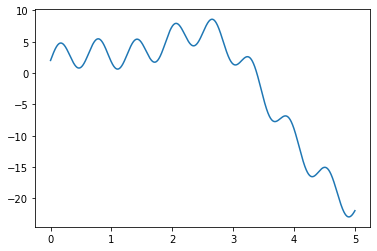

In [2]:
f = open("data.pkl", "rb")
raw = pickle.load(f)
plt.plot(raw[:,0], raw[:,1])
np.random.shuffle(raw)

In [3]:
training_size = len(raw) // 10 * 9
training_set = raw[:training_size]
print(training_set[:5])


[[ 1.079       0.67942851]
 [ 0.584       2.18538978]
 [ 1.293       3.75342063]
 [ 3.943      -7.56990169]
 [ 2.34        4.33605228]]


In [4]:
test_set = raw[training_size:]
print(test_set[:5])

[[  1.967        6.87874422]
 [  2.657        8.56140752]
 [  0.436        0.88728113]
 [  1.263        3.0633301 ]
 [  4.947      -22.68266838]]


In [5]:
assert(len(training_set) + len(test_set) == len(raw))

In [6]:
partition_size = len(training_set) // PARTITION_COUNT
print(training_set[:5])

[[ 1.079       0.67942851]
 [ 0.584       2.18538978]
 [ 1.293       3.75342063]
 [ 3.943      -7.56990169]
 [ 2.34        4.33605228]]


In [7]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(MAX_POLY, 2))

for degree in range(1, MAX_POLY + 1):

    test_poly_xs = np.zeros(shape=(test_set.shape[0], degree))
    for row in range(test_set.shape[0]):
        test_poly_xs[row] = np.concatenate(
            list(test_xs[row] ** i for i in range(1, degree + 1))
        )

    predicted = np.zeros(shape=(test_set.shape[0], PARTITION_COUNT))

    for set_idx in range(PARTITION_COUNT):
        lo = set_idx * partition_size
        hi = (set_idx + 1) * partition_size

        cur_training = training_set[lo:hi]
        train_xs = cur_training[:, :1]
        train_ys = cur_training[:, 1]
        poly = np.zeros(shape=(cur_training.shape[0], degree))
        for row in range(cur_training.shape[0]):
            np.concatenate(
                list(train_xs[row] ** i for i in range(1, degree + 1)), out=poly[row]
            )

        model = linear_model.LinearRegression()

        model.fit(poly, train_ys)

        predicted[:, set_idx] = model.predict(test_poly_xs)
        


    expected_val = np.sum(predicted, axis=1) / PARTITION_COUNT
  
    assert expected_val.shape == test_ys.shape
    degree_vs_bias[degree - 1, 0] = (
        np.sqrt(np.sum((expected_val - test_ys) ** 2) / expected_val.shape)
    )

    variance = (
        np.sum(
            (predicted - np.repeat(expected_val.reshape(500, 1), 10, axis=1)) ** 2,
            axis=1,
        )
        / PARTITION_COUNT
    )
    variance = np.sum(variance) / test_set.shape[0]
    degree_vs_bias[degree - 1, 1] = variance
    print(
        "degree {} bias = {} variance = {}".format(
            degree, degree_vs_bias[degree - 1][0], degree_vs_bias[degree - 1][1]
        )
    )
    

degree 1 bias = 5.8078031006250725 variance = 0.08333790375956303
degree 2 bias = 2.5424719540296437 variance = 0.0273270678066226
degree 3 bias = 2.3958608793121807 variance = 0.037700924075455514
degree 4 bias = 1.7432527862889964 variance = 0.03137562268922603
degree 5 bias = 1.695011797192436 variance = 0.040439077367687204
degree 6 bias = 1.621303383775312 variance = 0.029485283566944957
degree 7 bias = 1.591410195057877 variance = 0.05343782408102338
degree 8 bias = 1.5770841194754452 variance = 0.06019293803852322
degree 9 bias = 1.5763606619637052 variance = 0.05040609071464493
degree 10 bias = 1.5767349564750903 variance = 0.06903237725939343
degree 11 bias = 1.5191752545387056 variance = 0.04662855190887174
degree 12 bias = 1.5191459580854185 variance = 0.053758911082165246
degree 13 bias = 1.4254318102560382 variance = 0.06222233407255348
degree 14 bias = 1.425676789072976 variance = 0.07361823711305626
degree 15 bias = 1.4248253743909642 variance = 0.1180085834870371
degree

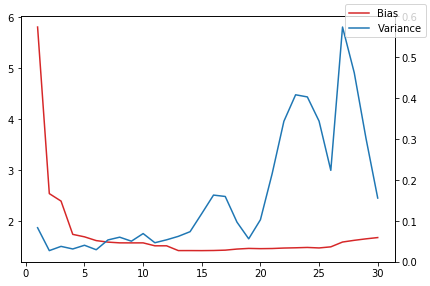

In [8]:
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:, 0], color=color, label="Bias")
color = "tab:blue"
ax2 = ax1.twinx()
ax2.plot(
    list(range(1, MAX_POLY + 1)), degree_vs_bias[:, 1], color=color, label="Variance"
)
fig.tight_layout()
fig.legend()
plt.show()

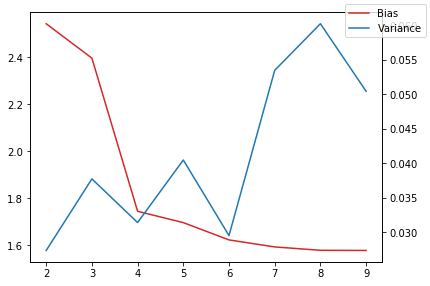

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(2, 10)), degree_vs_bias[:,0][1:9], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(2,10)), degree_vs_bias[:,1][1:9], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()

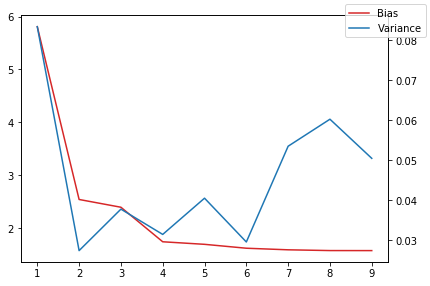

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(1, 10)), degree_vs_bias[:,0][0:9], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(1,10)), degree_vs_bias[:,1][0:9], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()